## Imports & Settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jarradjinx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import Dataset

In [2]:
sem_train = pd.read_csv('../data/target_semEval2022_en/iSarcasmEval-main/train/train.En.csv', index_col=0)
sem_train = sem_train.rename(columns={'tweet': 'text'})

sem_train.head(100)

,text,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
95,@PFTompkins Her family should definitely not s...,1,They should seek guidance.,1.0,0.0,0.0,0.0,0.0,0.0
96,How I flirt with boys \n\nBoy: “Hey I saw you ...,1,I could have said thanks for coming over,1.0,0.0,0.0,0.0,0.0,1.0
97,Been trying to get my boyfriends attention. Le...,1,Sitting next to my boyfriend but he'll notice ...,1.0,0.0,0.0,0.0,0.0,0.0
98,My work email isn’t working so I can just log ...,1,I wish I would log off for the day because my ...,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:
sem_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3468 entries, 0 to 3467
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text                 3467 non-null   object 
 1   sarcastic            3468 non-null   int64  
 2   rephrase             867 non-null    object 
 3   sarcasm              867 non-null    float64
 4   irony                867 non-null    float64
 5   satire               867 non-null    float64
 6   understatement       867 non-null    float64
 7   overstatement        867 non-null    float64
 8   rhetorical_question  867 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 270.9+ KB


## Remove Null

In [4]:
nan_in_tweet  = sem_train[sem_train['text'].isna()]
nan_in_tweet.head()

,text,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
1062,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sem_train = sem_train.dropna(subset=['text'])

sem_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3467 entries, 0 to 3467
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text                 3467 non-null   object 
 1   sarcastic            3467 non-null   int64  
 2   rephrase             867 non-null    object 
 3   sarcasm              867 non-null    float64
 4   irony                867 non-null    float64
 5   satire               867 non-null    float64
 6   understatement       867 non-null    float64
 7   overstatement        867 non-null    float64
 8   rhetorical_question  867 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 270.9+ KB


In [6]:
nan_in_rephrase  = sem_train[sem_train['rephrase'].isna()]
nan_in_rephrase.head()

,text,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
867,I always think going braless is a good idea un...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,life is so much better with a heating blanket,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,Sometimes I just go through my phone and look ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
870,was not back in the states for even 5 minutes ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,in desperate need of (and I can NOT stress thi...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## View Label Distribution

[Text(0, 0, '2600'), Text(0, 0, '867')]

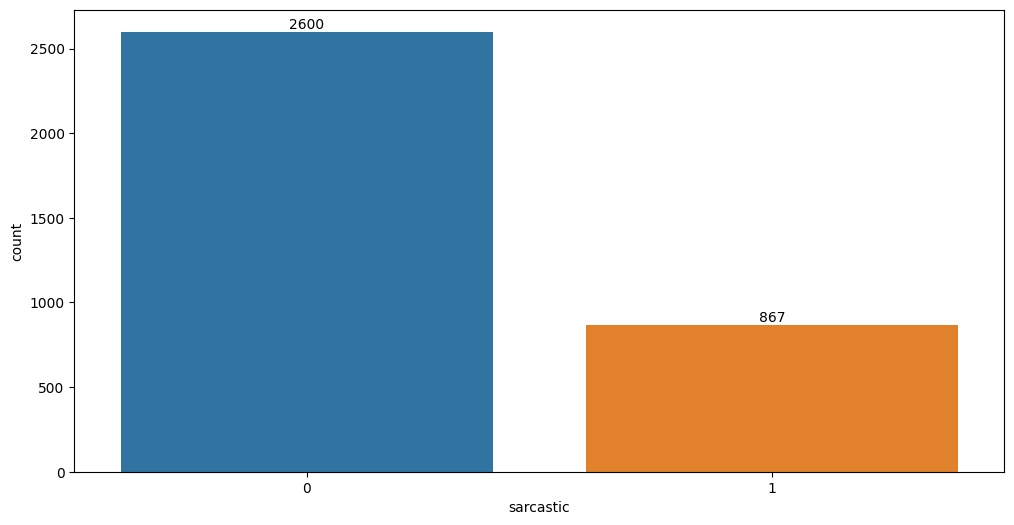

In [7]:
fig = plt.figure(figsize=(12, 6))
ax = sns.countplot(x='sarcastic', data=sem_train)
ax.bar_label(ax.containers[0])

## View Word Counts & Word Count Distribution 

In [8]:
sem_train['num_word_text'] = sem_train['text'].apply(lambda x:len(str(x).split()))
sem_train.head()

,text,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,num_word_text
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0,11
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0,26
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0,36
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0,17
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0,29


In [9]:
sem_train.describe()

,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,num_word_text
count,3467.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,3467.000000
mean,0.250072,0.822376,0.178777,0.028835,0.011534,0.046136,0.116494,18.833285
std,0.433117,0.382417,0.383387,0.167439,0.106837,0.209901,0.321001,11.276871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.000000


<AxesSubplot: xlabel='num_word_text', ylabel='Count'>

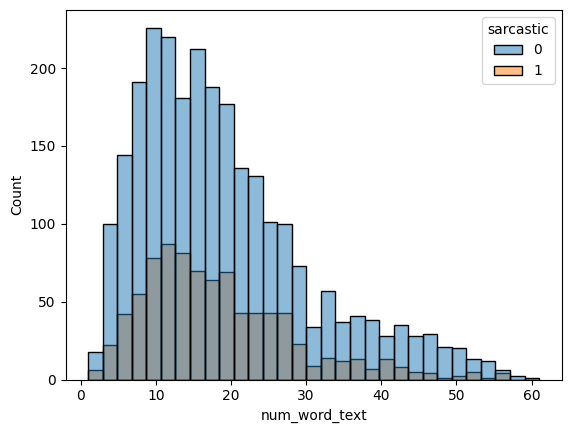

In [10]:
sns.histplot(x="num_word_text", data=sem_train,  hue="sarcastic")

In [11]:
pd.options.display.max_colwidth = 100
sem_train['text']

0                                                 The only thing I got from college is a caffeine addiction
1       I love it when professors draw a big question mark next to my answer on an exam because I’m alwa...
2       Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in...
3                          Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee
4       @VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worr...
                                                       ...                                                 
3463                                  The population spike in Chicago in 9 months is about to be ridiculous
3464         You'd think in the second to last English class of the year my prof would stop calling me Sean
3465    I’m finally surfacing after a holiday to Scotland and a difficult few days with an ill child (ho...
3466    Couldn't be prouder 

In [12]:
pd.options.display.max_colwidth = 200
sem_train.loc[sem_train['num_word_text'] == 61]


,text,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,num_word_text
1585,I remember when I was a kid how I used to troll my dad. \nI’d be watching a film on sky movies and then when I knew he was in the other room I would say out loud ‘wow look at the tits on her’ \nHe...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61


## View Common Words

In [13]:
# cleaning for word-based EDA
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [14]:
sem_train['text'] = sem_train['text'].apply(lambda x:clean_text(x))
sem_train['temp_list'] = sem_train['text'].apply(lambda x:str(x).split())
sem_train['text_stopped'] = sem_train['temp_list'].apply(lambda x: [item for item in x if item not in stopwords.words('english')])
sem_train.head()

,text,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,num_word_text,temp_list,text_stopped
0,the only thing i got from college is a caffeine addiction,1,"College is really difficult, expensive, tiring, and I often question if a degree is worth the stress.",0.0,1.0,0.0,0.0,0.0,0.0,11,"[the, only, thing, i, got, from, college, is, a, caffeine, addiction]","[thing, got, college, caffeine, addiction]"
1,i love it when professors draw a big question mark next to my answer on an exam because i’m always like yeah i don’t either ¯ツ¯,1,I do not like when professors don’t write out specific notes on my answers to exams.,1.0,0.0,0.0,0.0,0.0,0.0,26,"[i, love, it, when, professors, draw, a, big, question, mark, next, to, my, answer, on, an, exam, because, i’m, always, like, yeah, i, don’t, either, ¯ツ¯]","[love, professors, draw, big, question, mark, next, answer, exam, i’m, always, like, yeah, don’t, either, ¯ツ¯]"
2,remember the hundred emails from companies when covid started getting real i’ve gotten three in regards to support for protests and only savagexfenty shared helpful links and actually said black l...,1,"I, at the bare minimum, wish companies actually cared about marginalized communities. At the max, that our capitalistic society is dismantled.",0.0,1.0,0.0,0.0,0.0,0.0,36,"[remember, the, hundred, emails, from, companies, when, covid, started, getting, real, i’ve, gotten, three, in, regards, to, support, for, protests, and, only, savagexfenty, shared, helpful, links...","[remember, hundred, emails, companies, covid, started, getting, real, i’ve, gotten, three, regards, support, protests, savagexfenty, shared, helpful, links, actually, said, black, lives, matter, l..."
3,today my poppop told me i was not “forced” to go to college 🙃 okay sure sureeee,1,"Today my pop-pop told me I was not ""forced"" to go to college. That's not true.",1.0,0.0,0.0,0.0,0.0,0.0,17,"[today, my, poppop, told, me, i, was, not, “forced”, to, go, to, college, 🙃, okay, sure, sureeee]","[today, poppop, told, “forced”, go, college, 🙃, okay, sure, sureeee]"
4,volphancarol littlewhitty mysticalmanatee i did too and i also reported cancun cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to mexico,1,I would say Ted Cruz is an asshole and doesn’t actually care about people/babies/fetuses. He just wants to wage a war on women and keep the patriarchy in power.,1.0,0.0,0.0,0.0,0.0,0.0,29,"[volphancarol, littlewhitty, mysticalmanatee, i, did, too, and, i, also, reported, cancun, cruz, not, worrying, about, the, heartbeats, of, his, constituents, without, electricity, or, heat, when,...","[volphancarol, littlewhitty, mysticalmanatee, also, reported, cancun, cruz, worrying, heartbeats, constituents, without, electricity, heat, fled, mexico]"


In [15]:
sarcastic_df = sem_train.loc[sem_train['sarcastic'] == 1]
not_sarcastic_df = sem_train.loc[sem_train['sarcastic'] == 0]

top_sarcastic = Counter([item for sublist in sarcastic_df['text_stopped'] for item in sublist])
top_sarcastic_temp = pd.DataFrame(top_sarcastic.most_common(20))
top_sarcastic_temp.columns = ['common_words','count']
top_sarcastic_temp

,common_words,count
0,love,83
1,like,67
2,i’m,61
3,get,59
4,day,56
5,im,44
6,one,42
7,time,42
8,people,41
9,really,40


<AxesSubplot: xlabel='count', ylabel='common_words'>

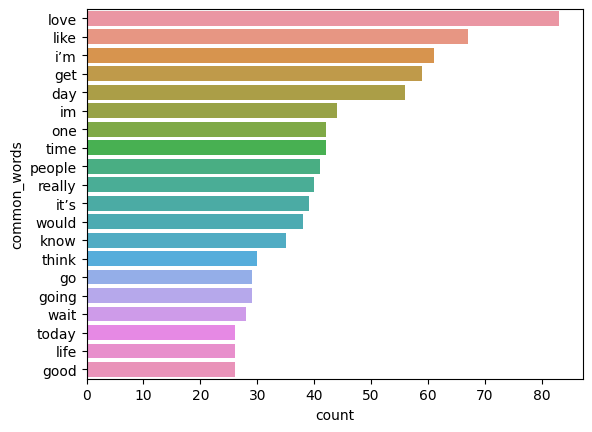

In [16]:
sns.barplot(x='count',y='common_words', data=top_sarcastic_temp)

In [17]:
top_not_sarcastic = Counter([item for sublist in not_sarcastic_df['text_stopped'] for item in sublist])
top_not_sarcastic_temp = pd.DataFrame(top_not_sarcastic.most_common(20))
top_not_sarcastic_temp.columns = ['common_words','count']
top_not_sarcastic_temp

,common_words,count
0,like,197
1,i’m,161
2,one,160
3,time,153
4,get,151
5,people,143
6,im,130
7,love,129
8,it’s,112
9,really,108


<AxesSubplot: xlabel='count', ylabel='common_words'>

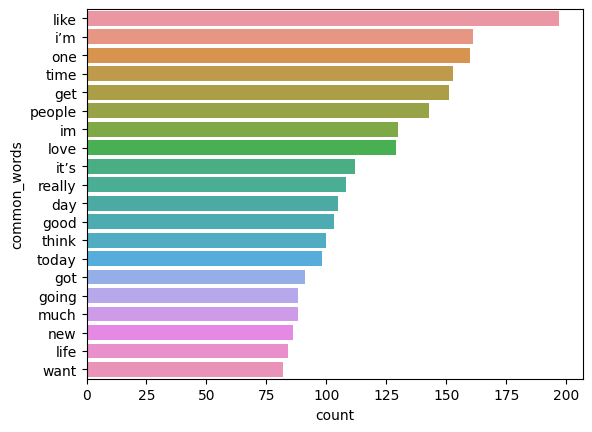

In [18]:
sns.barplot(x='count',y='common_words', data=top_not_sarcastic_temp)

## Adjust & Export Datasets for Train/test

## Prep Training Data

In [19]:
sem_train_prep = pd.read_csv('../data/target_semEval2022_en/iSarcasmEval-main/train/train.En.csv', index_col=0)
sem_train_prep.head()

,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,The only thing I got from college is a caffeine addiction,1,"College is really difficult, expensive, tiring, and I often question if a degree is worth the stress.",0.0,1.0,0.0,0.0,0.0,0.0
1,I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\_(ツ)_/¯,1,I do not like when professors don’t write out specific notes on my answers to exams.,1.0,0.0,0.0,0.0,0.0,0.0
2,Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said blac...,1,"I, at the bare minimum, wish companies actually cared about marginalized communities. At the max, that our capitalistic society is dismantled.",0.0,1.0,0.0,0.0,0.0,0.0
3,Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee,1,"Today my pop-pop told me I was not ""forced"" to go to college. That's not true.",1.0,0.0,0.0,0.0,0.0,0.0
4,"@VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to Mexico.",1,I would say Ted Cruz is an asshole and doesn’t actually care about people/babies/fetuses. He just wants to wage a war on women and keep the patriarchy in power.,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
sem_train_prep = sem_train_prep.rename(columns={'tweet': 'text', 'sarcastic': 'label'})
sem_train_prep = sem_train_prep[['text', 'label']]
sem_train_prep

,text,label
0,The only thing I got from college is a caffeine addiction,1
1,I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\_(ツ)_/¯,1
2,Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said blac...,1
3,Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee,1
4,"@VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to Mexico.",1
...,...,...
3463,The population spike in Chicago in 9 months is about to be ridiculous,0
3464,You'd think in the second to last English class of the year my prof would stop calling me Sean,0
3465,I’m finally surfacing after a holiday to Scotland and a difficult few days with an ill child (hopefully on the mend now). Happy September all! Smell the pencil shavings and that new notebook aroma...,0
3466,"Couldn't be prouder today. Well done to every student who got their GCSEs this morning after 18 months that would challenge anyone in history, at any stage in their lives. The teachers did an amaz...",0


In [21]:
sem_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3468 entries, 0 to 3467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3467 non-null   object
 1   label   3468 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 81.3+ KB


In [22]:
# drop rows with no text
sem_train_prep = sem_train_prep.dropna(subset=['text'])
sem_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3467 entries, 0 to 3467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3467 non-null   object
 1   label   3467 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 81.3+ KB


In [23]:
sem_train_prep['label'].value_counts()

0    2600
1     867
Name: label, dtype: int64

### Oversample Underrepresented Class

In [24]:
def oversample(df):
    classes = df.label.value_counts().to_dict()
    most = max(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['label'] == key]) 
    classes_sample = []
    for i in range(1,len(classes_list)):
        classes_sample.append(classes_list[i].sample(most, replace=True))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
    final_df = final_df.reset_index(drop=True)
    return final_df

oversampled_df = oversample(sem_train_prep)

In [25]:
# shuffle dataframe
oversampled_df = oversampled_df.sample(frac=1)
oversampled_df['label'].value_counts()

1    2600
0    2600
Name: label, dtype: int64

In [26]:
oversampled_df.head(50)

,text,label
1173,@ThePartridgePod Defrost the freezer with the cast of Hollyoaks. Any of them that wanted an extra fun trip could pop to the recycling centre with some empty pesto jars. Magic.,1
314,really honoured to have shared a coach today with a group of girls who didn’t know downing street was real and thought the prime minister and the queen lived together at buckingham palace,1
2561,I can't believe today is the last day we can be gay.,1
8,"thank you kind person that stole my ATM card, you must have known I wanted to sit at the bank all day.. half hour and still waiting #mondays",1
1356,I love leaving the doctors office in tears. I need this kid to just decide to leave my body so we can be done and home together.,1
4224,I knew this year would b stressful but i didn't know it would b THIS STRESSFUL i am about to BREAK and january isnt even over yet,0
467,Thank you to @OrchardMead for organising pizza and ice cream! It was a lovely end of year gesture 😁💕 Happy holidays everyone - time to collect our time owed in lieu! 😅 #summerholidays https://t.co...,1
340,Mad how many cars they make now without indicators 🙃,1
2924,@SkyHelpTeam I've been waiting for a refund for over six weeks from Sky and no one seems interested in helping me despite multiple calls to your customer service team. Please help me! Sky took my ...,0
304,"Here comes the final of the UK #DailyBriefing - who will win, Johnson or Covid?",1


In [27]:
oversampled_df.to_csv('../data/target_semEval2022_en/iSarcasmEval-main/train/train.en.prepped-oversampled.csv', index=False)

## Prep Test Data

In [24]:
sem_test_prep = pd.read_csv('../data/target_semEval2022_en/iSarcasmEval-main/test/task_A_En_test.csv')
sem_test_prep.head()

,text,sarcastic
0,"Size on the the Toulouse team, That pack is monstrous. \n\nI can't see a Welsh region ever winning this, Money talks as they say .",0
1,Pinball!,0
2,So the Scottish Government want people to get their booster shots so badly that the website doesn't even work,1
3,villainous pro tip : change the device name on her bluetooth devices so she doesn’t forget u,0
4,I would date any of these men 🥺,0


In [25]:
sem_test_prep = sem_test_prep.rename(columns={'sarcastic': 'label'})
sem_test_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1400 non-null   object
 1   label   1400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.0+ KB


In [26]:
sem_test_prep.to_csv('../data/target_semEval2022_en/iSarcasmEval-main/test/task_A_En_test.prepped.csv', index=False)